**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *A comparison between Logistic Regression and MPL Neural Network in Music Genre Classification* 

## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

First we start with importing data in and assign corresponding headers and data types. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load the data and cleanup
x_header = pd.read_csv("x_header.csv")
train_data = pd.read_csv('train_data.csv', header = None)
test_data = pd.read_csv('test_data.csv', header = None)
train_labels = pd.read_csv('train_labels.csv', header = None, dtype = 'category' )

header = pd.DataFrame(data = x_header)
X = pd.DataFrame(data = train_data)
X.columns = header.ID
X_test = pd.DataFrame(data = test_data)
X_test.columns = header.ID
y = pd.DataFrame(data = train_labels)
y.columns = ['Genre']


Let's start with examining the labels. 
We have 10 labels denoting by numbers from 1-10, each corresponding to one music genre. A histogram is created to show the distribution of these 10 classes (Figure 1). We can see clearly in here there is a significant imbalance between those classes. Pop/Rock already accounts for 50% of the labels. Also, there are minority classes like Blues, Reggae in which only account for 2% of the training data. This lack of information will make it difficult for training the models to classify minority classes. 

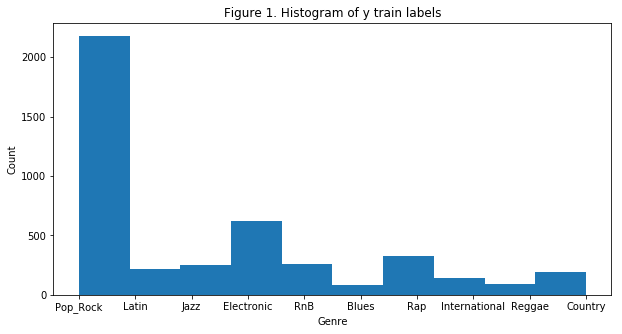

(array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([2178,   86,  618,  326,  253,  214,  260,  141,  195,   92]))


In [2]:
#Examine y
plt.figure(figsize=(10,5))
plt.hist(y.values)
plt.xlabel("Genre")
plt.ylabel("Count")
x_values = ['1','2','3','4','5','6','7','8','9','10']
x_texts = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
plt.xticks(x_values, x_texts)
plt.title("Figure 1. Histogram of y train labels")
plt.show()

print(np.unique(y,return_counts = True))

Next we move on to examine the feature data:

In [3]:
#Analysis of the feature data
X.drop_duplicates() #drop duplicates if there are
print(X.info())
print(X_test.info())
display(HTML(X.head(10).to_html(max_rows=10)))
display(HTML(X_test.head(10).to_html(max_rows=10)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Columns: 264 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(264)
memory usage: 8.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Columns: 264 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(264)
memory usage: 13.2 MB
None


ID,Rhythm_Mean_1,Rhythm_Mean_2,Rhythm_Mean_3,Rhythm_Mean_4,Rhythm_Mean_5,Rhythm_Mean_6,Rhythm_Mean_7,Rhythm_Mean_8,Rhythm_Mean_9,Rhythm_Mean_10,Rhythm_Mean_11,Rhythm_Mean_12,Rhythm_Mean_13,Rhythm_Mean_14,Rhythm_Mean_15,Rhythm_Mean_16,Rhythm_Mean_17,Rhythm_Mean_18,Rhythm_Mean_19,Rhythm_Mean_20,Rhythm_Mean_21,Rhythm_Mean_22,Rhythm_Mean_23,Rhythm_Mean_24,Rhythm_Median_1,Rhythm_Median_2,Rhythm_Median_3,Rhythm_Median_4,Rhythm_Median_5,Rhythm_Median_6,Rhythm_Median_7,Rhythm_Median_8,Rhythm_Median_9,Rhythm_Median_10,Rhythm_Median_11,Rhythm_Median_12,Rhythm_Median_13,Rhythm_Median_14,Rhythm_Median_15,Rhythm_Median_16,Rhythm_Median_17,Rhythm_Median_18,Rhythm_Median_19,Rhythm_Median_20,Rhythm_Median_21,Rhythm_Median_22,Rhythm_Median_23,Rhythm_Median_24,Rhythm_Var_1,Rhythm_Var_2,Rhythm_Var_3,Rhythm_Var_4,Rhythm_Var_5,Rhythm_Var_6,Rhythm_Var_7,Rhythm_Var_8,Rhythm_Var_9,Rhythm_Var_10,Rhythm_Var_11,Rhythm_Var_12,Rhythm_Var_13,Rhythm_Var_14,Rhythm_Var_15,Rhythm_Var_16,Rhythm_Var_17,Rhythm_Var_18,Rhythm_Var_19,Rhythm_Var_20,Rhythm_Var_21,Rhythm_Var_22,Rhythm_Var_23,Rhythm_Var_24,Rhythm_Kurtosis_1,Rhythm_Kurtosis_2,Rhythm_Kurtosis_3,Rhythm_Kurtosis_4,Rhythm_Kurtosis_5,Rhythm_Kurtosis_6,Rhythm_Kurtosis_7,Rhythm_Kurtosis_8,Rhythm_Kurtosis_9,Rhythm_Kurtosis_10,Rhythm_Kurtosis_11,Rhythm_Kurtosis_12,Rhythm_Kurtosis_13,Rhythm_Kurtosis_14,Rhythm_Kurtosis_15,Rhythm_Kurtosis_16,Rhythm_Kurtosis_17,Rhythm_Kurtosis_18,Rhythm_Kurtosis_19,Rhythm_Kurtosis_20,Rhythm_Kurtosis_21,Rhythm_Kurtosis_22,Rhythm_Kurtosis_23,Rhythm_Kurtosis_24,Rhythm_Skewness_1,Rhythm_Skewness_2,Rhythm_Skewness_3,Rhythm_Skewness_4,Rhythm_Skewness_5,Rhythm_Skewness_6,Rhythm_Skewness_7,Rhythm_Skewness_8,Rhythm_Skewness_9,Rhythm_Skewness_10,Rhythm_Skewness_11,Rhythm_Skewness_12,Rhythm_Skewness_13,Rhythm_Skewness_14,Rhythm_Skewness_15,Rhythm_Skewness_16,Rhythm_Skewness_17,Rhythm_Skewness_18,Rhythm_Skewness_19,Rhythm_Skewness_20,Rhythm_Skewness_21,Rhythm_Skewness_22,Rhythm_Skewness_23,Rhythm_Skewness_24,Rhythm_Min_1,Rhythm_Min_2,Rhythm_Min_3,Rhythm_Min_4,Rhythm_Min_5,Rhythm_Min_6,Rhythm_Min_7,Rhythm_Min_8,Rhythm_Min_9,Rhythm_Min_10,Rhythm_Min_11,Rhythm_Min_12,Rhythm_Min_13,Rhythm_Min_14,Rhythm_Min_15,Rhythm_Min_16,Rhythm_Min_17,Rhythm_Min_18,Rhythm_Min_19,Rhythm_Min_20,Rhythm_Min_21,Rhythm_Min_22,Rhythm_Min_23,Rhythm_Min_24,Rhythm_Max_1,Rhythm_Max_2,Rhythm_Max_3,Rhythm_Max_4,Rhythm_Max_5,Rhythm_Max_6,Rhythm_Max_7,Rhythm_Max_8,Rhythm_Max_9,Rhythm_Max_10,Rhythm_Max_11,Rhythm_Max_12,Rhythm_Max_13,Rhythm_Max_14,Rhythm_Max_15,Rhythm_Max_16,Rhythm_Max_17,Rhythm_Max_18,Rhythm_Max_19,Rhythm_Max_20,Rhythm_Max_21,Rhythm_Max_22,Rhythm_Max_23,Rhythm_Max_24,Chroma_Mean_1,Chroma_Mean_2,Chroma_Mean_3,Chroma_Mean_4,Chroma_Mean_5,Chroma_Mean_6,Chroma_Mean_7,Chroma_Mean_8,Chroma_Mean_9,Chroma_Mean_10,Chroma_Mean_11,Chroma_Mean_12,Chroma_Std_1,Chroma_Std_2,Chroma_Std_3,Chroma_Std_4,Chroma_Std_5,Chroma_Std_6,Chroma_Std_7,Chroma_Std_8,Chroma_Std_9,Chroma_Std_10,Chroma_Std_11,Chroma_Std_12,Chroma_Min_1,Chroma_Min_2,Chroma_Min_3,Chroma_Min_4,Chroma_Min_5,Chroma_Min_6,Chroma_Min_7,Chroma_Min_8,Chroma_Min_9,Chroma_Min_10,Chroma_Min_11,Chroma_Min_12,Chroma_Max_1,Chroma_Max_2,Chroma_Max_3,Chroma_Max_4,Chroma_Max_5,Chroma_Max_6,Chroma_Max_7,Chroma_Max_8,Chroma_Max_9,Chroma_Max_10,Chroma_Max_11,Chroma_Max_12,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,MFCC_Mean_6,MFCC_Mean_7,MFCC_Mean_8,MFCC_Mean_9,MFCC_Mean_10,MFCC_Mean_11,MFCC_Mean_12,MFCC_Std_1,MFCC_Std_2,MFCC_Std_3,MFCC_Std_4,MFCC_Std_5,MFCC_Std_6,MFCC_Std_7,MFCC_Std_8,MFCC_Std_9,MFCC_Std_10,MFCC_Std_11,MFCC_Std_12,MFCC_Min_1,MFCC_Min_2,MFCC_Min_3,MFCC_Min_4,MFCC_Min_5,MFCC_Min_6,MFCC_Min_7,MFCC_Min_8,MFCC_Min_9,MFCC_Min_10,MFCC_Min_11,MFCC_Min_12,MFCC_Max_1,MFCC_Max_2,MFCC_Max_3,MFCC_Max_4,MFCC_Max_5,MFCC_Max_6,MFCC_Max_7,MFCC_Max_8,MFCC_Max_9,MFCC_Max_10,MFCC_Max_11,MFCC_Max_12
0,1040.70,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.70,1953.4,1513.50,1882.60,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.390,1.49

ID,Rhythm_Mean_1,Rhythm_Mean_2,Rhythm_Mean_3,Rhythm_Mean_4,Rhythm_Mean_5,Rhythm_Mean_6,Rhythm_Mean_7,Rhythm_Mean_8,Rhythm_Mean_9,Rhythm_Mean_10,Rhythm_Mean_11,Rhythm_Mean_12,Rhythm_Mean_13,Rhythm_Mean_14,Rhythm_Mean_15,Rhythm_Mean_16,Rhythm_Mean_17,Rhythm_Mean_18,Rhythm_Mean_19,Rhythm_Mean_20,Rhythm_Mean_21,Rhythm_Mean_22,Rhythm_Mean_23,Rhythm_Mean_24,Rhythm_Median_1,Rhythm_Median_2,Rhythm_Median_3,Rhythm_Median_4,Rhythm_Median_5,Rhythm_Median_6,Rhythm_Median_7,Rhythm_Median_8,Rhythm_Median_9,Rhythm_Median_10,Rhythm_Median_11,Rhythm_Median_12,Rhythm_Median_13,Rhythm_Median_14,Rhythm_Median_15,Rhythm_Median_16,Rhythm_Median_17,Rhythm_Median_18,Rhythm_Median_19,Rhythm_Median_20,Rhythm_Median_21,Rhythm_Median_22,Rhythm_Median_23,Rhythm_Median_24,Rhythm_Var_1,Rhythm_Var_2,Rhythm_Var_3,Rhythm_Var_4,Rhythm_Var_5,Rhythm_Var_6,Rhythm_Var_7,Rhythm_Var_8,Rhythm_Var_9,Rhythm_Var_10,Rhythm_Var_11,Rhythm_Var_12,Rhythm_Var_13,Rhythm_Var_14,Rhythm_Var_15,Rhythm_Var_16,Rhythm_Var_17,Rhythm_Var_18,Rhythm_Var_19,Rhythm_Var_20,Rhythm_Var_21,Rhythm_Var_22,Rhythm_Var_23,Rhythm_Var_24,Rhythm_Kurtosis_1,Rhythm_Kurtosis_2,Rhythm_Kurtosis_3,Rhythm_Kurtosis_4,Rhythm_Kurtosis_5,Rhythm_Kurtosis_6,Rhythm_Kurtosis_7,Rhythm_Kurtosis_8,Rhythm_Kurtosis_9,Rhythm_Kurtosis_10,Rhythm_Kurtosis_11,Rhythm_Kurtosis_12,Rhythm_Kurtosis_13,Rhythm_Kurtosis_14,Rhythm_Kurtosis_15,Rhythm_Kurtosis_16,Rhythm_Kurtosis_17,Rhythm_Kurtosis_18,Rhythm_Kurtosis_19,Rhythm_Kurtosis_20,Rhythm_Kurtosis_21,Rhythm_Kurtosis_22,Rhythm_Kurtosis_23,Rhythm_Kurtosis_24,Rhythm_Skewness_1,Rhythm_Skewness_2,Rhythm_Skewness_3,Rhythm_Skewness_4,Rhythm_Skewness_5,Rhythm_Skewness_6,Rhythm_Skewness_7,Rhythm_Skewness_8,Rhythm_Skewness_9,Rhythm_Skewness_10,Rhythm_Skewness_11,Rhythm_Skewness_12,Rhythm_Skewness_13,Rhythm_Skewness_14,Rhythm_Skewness_15,Rhythm_Skewness_16,Rhythm_Skewness_17,Rhythm_Skewness_18,Rhythm_Skewness_19,Rhythm_Skewness_20,Rhythm_Skewness_21,Rhythm_Skewness_22,Rhythm_Skewness_23,Rhythm_Skewness_24,Rhythm_Min_1,Rhythm_Min_2,Rhythm_Min_3,Rhythm_Min_4,Rhythm_Min_5,Rhythm_Min_6,Rhythm_Min_7,Rhythm_Min_8,Rhythm_Min_9,Rhythm_Min_10,Rhythm_Min_11,Rhythm_Min_12,Rhythm_Min_13,Rhythm_Min_14,Rhythm_Min_15,Rhythm_Min_16,Rhythm_Min_17,Rhythm_Min_18,Rhythm_Min_19,Rhythm_Min_20,Rhythm_Min_21,Rhythm_Min_22,Rhythm_Min_23,Rhythm_Min_24,Rhythm_Max_1,Rhythm_Max_2,Rhythm_Max_3,Rhythm_Max_4,Rhythm_Max_5,Rhythm_Max_6,Rhythm_Max_7,Rhythm_Max_8,Rhythm_Max_9,Rhythm_Max_10,Rhythm_Max_11,Rhythm_Max_12,Rhythm_Max_13,Rhythm_Max_14,Rhythm_Max_15,Rhythm_Max_16,Rhythm_Max_17,Rhythm_Max_18,Rhythm_Max_19,Rhythm_Max_20,Rhythm_Max_21,Rhythm_Max_22,Rhythm_Max_23,Rhythm_Max_24,Chroma_Mean_1,Chroma_Mean_2,Chroma_Mean_3,Chroma_Mean_4,Chroma_Mean_5,Chroma_Mean_6,Chroma_Mean_7,Chroma_Mean_8,Chroma_Mean_9,Chroma_Mean_10,Chroma_Mean_11,Chroma_Mean_12,Chroma_Std_1,Chroma_Std_2,Chroma_Std_3,Chroma_Std_4,Chroma_Std_5,Chroma_Std_6,Chroma_Std_7,Chroma_Std_8,Chroma_Std_9,Chroma_Std_10,Chroma_Std_11,Chroma_Std_12,Chroma_Min_1,Chroma_Min_2,Chroma_Min_3,Chroma_Min_4,Chroma_Min_5,Chroma_Min_6,Chroma_Min_7,Chroma_Min_8,Chroma_Min_9,Chroma_Min_10,Chroma_Min_11,Chroma_Min_12,Chroma_Max_1,Chroma_Max_2,Chroma_Max_3,Chroma_Max_4,Chroma_Max_5,Chroma_Max_6,Chroma_Max_7,Chroma_Max_8,Chroma_Max_9,Chroma_Max_10,Chroma_Max_11,Chroma_Max_12,MFCC_Mean_1,MFCC_Mean_2,MFCC_Mean_3,MFCC_Mean_4,MFCC_Mean_5,MFCC_Mean_6,MFCC_Mean_7,MFCC_Mean_8,MFCC_Mean_9,MFCC_Mean_10,MFCC_Mean_11,MFCC_Mean_12,MFCC_Std_1,MFCC_Std_2,MFCC_Std_3,MFCC_Std_4,MFCC_Std_5,MFCC_Std_6,MFCC_Std_7,MFCC_Std_8,MFCC_Std_9,MFCC_Std_10,MFCC_Std_11,MFCC_Std_12,MFCC_Min_1,MFCC_Min_2,MFCC_Min_3,MFCC_Min_4,MFCC_Min_5,MFCC_Min_6,MFCC_Min_7,MFCC_Min_8,MFCC_Min_9,MFCC_Min_10,MFCC_Min_11,MFCC_Min_12,MFCC_Max_1,MFCC_Max_2,MFCC_Max_3,MFCC_Max_4,MFCC_Max_5,MFCC_Max_6,MFCC_Max_7,MFCC_Max_8,MFCC_Max_9,MFCC_Max_10,MFCC_Max_11,MFCC_Max_12
0,3115.50,3151.9,2742.2,3236.8,2580.6,2662.6,2372.2,2569.6,2310.7,2502.1,2428.2,2378.60,2970.8,3103.1,3817.4,4147.1,3920.10,3407.60,2426.80,1857.40,1478.60,1276.10,555.870,

We have 4363 songs'data for training and 6544 for testing the models. Each songs' data has 264 features representing 3 main components of music: timbre, pitch and rhythm. There is no duplicates. Looking further into each column's data:

In [4]:
#Summary data frequencies
for i in X.columns:
    print("X", X[i].value_counts().head(3))
    print("X_test", X_test[i].value_counts().head(3))
#print(y.loc[X['MFCC_Min_1']==0].groupby('Genre').size())
#print(y.loc[X['MFCC_Min_1']>0].groupby('Genre').size())


X 3529.9    3
3353.5    3
1455.4    3
Name: Rhythm_Mean_1, dtype: int64
X_test 1.066       4
2082.900    3
2962.600    3
Name: Rhythm_Mean_1, dtype: int64
X 3307.8    3
3458.6    3
4542.5    3
Name: Rhythm_Mean_2, dtype: int64
X_test 1.066       4
5274.700    4
4951.900    3
Name: Rhythm_Mean_2, dtype: int64
X 3327.5    3
5376.9    3
3986.6    3
Name: Rhythm_Mean_3, dtype: int64
X_test 1.066       4
3476.200    4
3740.100    3
Name: Rhythm_Mean_3, dtype: int64
X 3581.4    3
6023.9    3
4236.6    3
Name: Rhythm_Mean_4, dtype: int64
X_test 3498.900    4
1.066       4
4168.000    4
Name: Rhythm_Mean_4, dtype: int64
X 3530.8    3
2844.0    3
3479.5    3
Name: Rhythm_Mean_5, dtype: int64
X_test 1.066       4
2929.900    4
3351.600    3
Name: Rhythm_Mean_5, dtype: int64
X 3318.8    3
3073.8    3
3305.5    3
Name: Rhythm_Mean_6, dtype: int64
X_test 1.066       4
3051.200    4
3046.900    4
Name: Rhythm_Mean_6, dtype: int64
X 3315.1    3
3321.7    3
3013.2    3
Name: Rhythm_Mean_7, dtype: int6

X 1000.0    31
1201.7     3
1530.0     3
Name: Rhythm_Var_23, dtype: int64
X_test 1000.0    54
1742.4     4
1125.8     4
Name: Rhythm_Var_23, dtype: int64
X 1000.0    3262
2286.9       2
2012.4       2
Name: Rhythm_Var_24, dtype: int64
X_test 1000.0    4879
9615.6       4
1594.0       2
Name: Rhythm_Var_24, dtype: int64
X 3995.8    3
2861.1    3
3575.9    3
Name: Rhythm_Kurtosis_1, dtype: int64
X_test 2771.9    4
1000.0    4
2932.2    3
Name: Rhythm_Kurtosis_1, dtype: int64
X 2860.7    3
2796.2    3
3184.2    3
Name: Rhythm_Kurtosis_2, dtype: int64
X_test 1000.0    4
2995.5    3
3506.2    3
Name: Rhythm_Kurtosis_2, dtype: int64
X 3015.8    3
3762.4    3
3269.9    3
Name: Rhythm_Kurtosis_3, dtype: int64
X_test 3029.4    4
3380.1    4
2756.8    4
Name: Rhythm_Kurtosis_3, dtype: int64
X 2857.1    3
3286.2    3
2980.2    3
Name: Rhythm_Kurtosis_4, dtype: int64
X_test 1000.0    4
3451.7    4
2991.3    4
Name: Rhythm_Kurtosis_4, dtype: int64
X 4154.6    3
3489.8    3
3516.6    3
Name: Rhythm

X 1.066      369
112.800      3
313.570      2
Name: Rhythm_Min_22, dtype: int64
X_test 1.066      566
287.680      3
173.930      3
Name: Rhythm_Min_22, dtype: int64
X 1.066     1536
2.561        3
21.452       2
Name: Rhythm_Min_23, dtype: int64
X_test 1.066      2351
109.120       3
12.973        3
Name: Rhythm_Min_23, dtype: int64
X 1.066     4211
1.762        2
15.852       2
Name: Rhythm_Min_24, dtype: int64
X_test 1.066    6347
1.115       2
1.119       2
Name: Rhythm_Min_24, dtype: int64
X 11107.0    4
11555.0    4
10387.0    4
Name: Rhythm_Max_1, dtype: int64
X_test 11652.0    4
10743.0    4
10204.0    4
Name: Rhythm_Max_1, dtype: int64
X 11442.0    4
11114.0    4
11266.0    4
Name: Rhythm_Max_2, dtype: int64
X_test 13001.0    6
12323.0    5
12993.0    5
Name: Rhythm_Max_2, dtype: int64
X 10408.0    5
10115.0    5
10840.0    4
Name: Rhythm_Max_3, dtype: int64
X_test 10240.0    5
11095.0    5
10456.0    5
Name: Rhythm_Max_3, dtype: int64
X 10050.0    4
10164.0    4
10123.0    4

X 1000000.0    4363
Name: MFCC_Mean_3, dtype: int64
X_test 1000000.0    6544
Name: MFCC_Mean_3, dtype: int64
X 1000000.0    4363
Name: MFCC_Mean_4, dtype: int64
X_test 1000000.0    6544
Name: MFCC_Mean_4, dtype: int64
X -0.015541    3
-0.012585    2
 0.005562    2
Name: MFCC_Mean_5, dtype: int64
X_test -0.032848    2
-0.027625    2
-0.014091    2
Name: MFCC_Mean_5, dtype: int64
X -0.013531    3
-0.017950    3
-0.015722    3
Name: MFCC_Mean_6, dtype: int64
X_test -0.022238    5
-0.010872    4
-0.021696    3
Name: MFCC_Mean_6, dtype: int64
X  0.014674    3
-0.011170    3
-0.004150    2
Name: MFCC_Mean_7, dtype: int64
X_test -0.012165    3
-0.014270    3
 0.012631    3
Name: MFCC_Mean_7, dtype: int64
X -0.010859    2
-0.004888    2
-0.012574    2
Name: MFCC_Mean_8, dtype: int64
X_test -0.012016    3
-0.010030    3
-0.011528    2
Name: MFCC_Mean_8, dtype: int64
X 0.017568    3
0.010451    3
0.010916    3
Name: MFCC_Mean_9, dtype: int64
X_test 0.011934    4
0.004503    3
0.013017    3
Name:

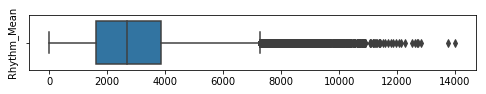

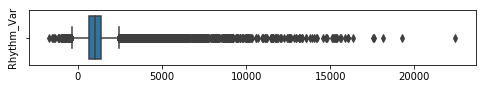

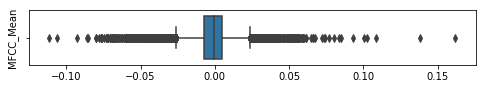

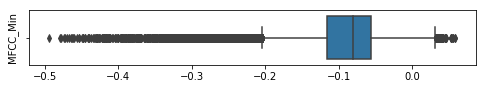

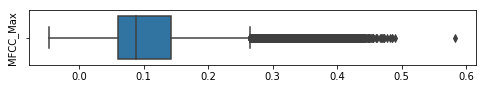

In [5]:
#Checking for outliers:

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,0:24])
plt.ylabel('Rhythm_Mean')
plt.show()
plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,48:72])
plt.ylabel('Rhythm_Var')
plt.show()
plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,220:228])
plt.ylabel('MFCC_Mean')
plt.show() 

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,240:252])
plt.ylabel('MFCC_Min')
plt.show()

plt.figure(figsize=(8,1))
sns.boxplot(X.iloc[:,252:264])
plt.ylabel('MFCC_Max')
plt.show()

From the above boxplots, it can be observed that there are certain outliers in the data. We will remove those outliers in order for the model to perform better. In addition, we could observe that the column 'MFCC_Mean_1', 'MFCC_Mean_2', 'MFCC_Mean_3', 'MFCC_Mean_4','MFCC_Min_1' seems to have a null or error data. We will drop those columns. 

In [6]:
#Remove outliers 
X = pd.concat([X, y], axis=1)
X = X[X.Rhythm_Mean_15 <= 12000]
X = X[X.Rhythm_Mean_16 <= 12000]
X = X[X.Rhythm_Mean_17 <= 12000]
X = X[X.Rhythm_Mean_17 <= 12000]
X = X[X.Rhythm_Var_24 <= 16000]
X = X[X.Rhythm_Var_23 <= 16000]
X = X[X.Rhythm_Var_22 <= 16000]
X = X[X.MFCC_Max_2 < 0.5]
X = X[(X.MFCC_Mean_5 > -0.8) & (X.MFCC_Mean_5 < 0.8) ]
X = X[(X.MFCC_Mean_6 > -0.8) & (X.MFCC_Mean_6 < 0.8) ]
X = X[(X.MFCC_Mean_7 > -0.8) & (X.MFCC_Mean_7 < 0.8) ]
X = X[(X.MFCC_Mean_8 > -0.8) & (X.MFCC_Mean_8 < 0.8) ]
X = X[(X.MFCC_Mean_9 > -0.8) & (X.MFCC_Mean_9 < 0.8) ]
X = X[(X.MFCC_Mean_10 > -0.8) & (X.MFCC_Mean_10 < 0.8) ]
X = X[(X.MFCC_Mean_11 > -0.8) & (X.MFCC_Mean_11 < 0.8) ]
X = X[(X.MFCC_Mean_12 > -0.8) & (X.MFCC_Mean_12 < 0.8) ]

y = pd.DataFrame(X.Genre)
X = X.iloc[:,:264]

X = X.drop(columns = ['MFCC_Mean_1','MFCC_Mean_2','MFCC_Mean_3','MFCC_Mean_4','MFCC_Min_1'])
X_test = X_test.drop(columns = ['MFCC_Mean_1','MFCC_Mean_2','MFCC_Mean_3','MFCC_Mean_4','MFCC_Min_1'])
#Sanity check how the dimensions has changed
print(X.info())
print(y.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4362
Columns: 259 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(259)
memory usage: 8.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4362
Data columns (total 1 columns):
Genre    4346 non-null category
dtypes: category(1)
memory usage: 38.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6544 entries, 0 to 6543
Columns: 259 entries, Rhythm_Mean_1 to MFCC_Max_12
dtypes: float64(259)
memory usage: 12.9 MB
None


## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [7]:
###Normalize data
from sklearn.preprocessing import MinMaxScaler

X = pd.concat([X,X_test]) # Concatenate the training and test datasets into a single dataframe
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
scaler.fit(X)
X = scaler.transform(X)

X_test_norm = X[4346:]
X_norm = X[:4346]


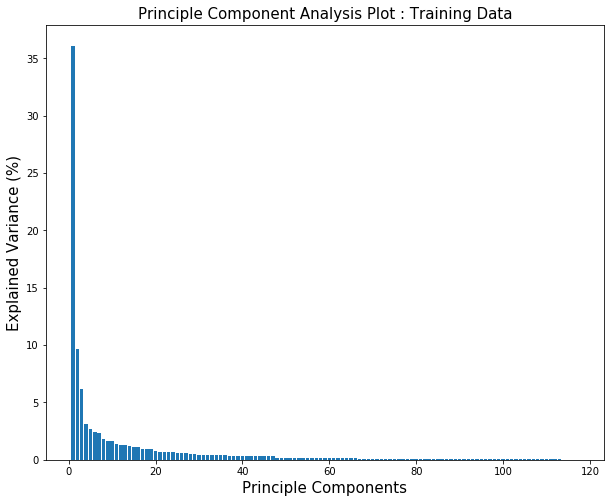

In [8]:
#Feature Selection 
from sklearn.decomposition import PCA
# Choose the number of principle components such that 98% of the variance is retained
pca = PCA(0.98)
X_PCA = pca.fit_transform(X)
varPCA = np.round(pca.explained_variance_ratio_*100, decimals = 1)
# Principal Component Analysis of data
plt.figure(figsize=(10,8))
plt.bar(x=range(1,len(varPCA)+1), height = varPCA)
plt.ylabel("Explained Variance (%)", size = 15)
plt.xlabel("Principle Components", size = 15)
plt.title("Principle Component Analysis Plot : Training Data", size = 15)
plt.show()

X_test_PCA = X_PCA[4346:]
X_PCA = X_PCA[:4346]



In [19]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold

    
def run_model_norm(model, alg_name):
    global X_norm
    global y
    y = np.ravel(y)    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
    results = cross_validate(model, X_norm, y, cv=cv, scoring=["neg_log_loss",'accuracy'])
    print(alg_name, ", Results:", results['test_neg_log_loss'],results['train_neg_log_loss'],results['test_accuracy'],results['train_accuracy'])
    
def run_model_PCA(model, alg_name):
    global X_PCA
    global y
    y = np.ravel(y)    
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state = 36851234)
    results = cross_validate(model, X_PCA, y, cv=cv, scoring=["neg_log_loss",'accuracy'])
    print(alg_name, ", Results:", results['test_neg_log_loss'],results['train_neg_log_loss'],results['test_accuracy'],results['train_accuracy'] )

In [20]:
#Running models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

names = ["Neural Net","LogReg"]

classifiers = [
    MLPClassifier(),
    LogisticRegression()]

for name, clf in zip(names, classifiers):
    run_model_norm(clf, name)
    run_model_PCA(clf, name)

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: [-1.15996792 -1.09439909 -1.08933402 -1.12483604 -1.12863407 -1.1590537 ] [-0.77025255 -0.7579265  -0.80445782 -0.7781477  -0.79034847 -0.76153158] [ 0.65196416  0.65172414  0.65051903  0.64920744  0.66137931  0.63737024] [ 0.74818653  0.75241713  0.73216132  0.75509499  0.73895028  0.76215098]


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt

Neural Net , Results: [-1.50028087 -1.34590344 -1.45171557 -1.5375438 ] [-0.18012978 -0.20297325 -0.19343664 -0.19034162] [ 0.61655172  0.63657301  0.62666667  0.62321511] [ 0.97835099  0.97241379  0.97927222  0.97609195]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LogReg , Results: [-1.15988078 -1.12085723 -1.12061054 -1.1372951  -1.14203437 -1.1376216 ] [-0.98252093 -1.00479272 -1.00220677 -0.99645478 -0.99074882 -0.99548546] [ 0.6402481   0.63793103  0.65121107  0.64093728  0.63931034  0.64290657] [ 0.68877375  0.68508287  0.67700793  0.6835924   0.68439227  0.6876939 ]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

LogReg , Results: [-1.16514177 -1.14398526 -1.15927852 -1.16302737] [-1.00631658 -1.03515672 -1.02215071 -1.01086866] [ 0.6308046   0.64394288  0.64275862  0.63242745] [ 0.68493782  0.66712644  0.673883    0.67632184]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
#Model tuning 


## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [11]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *